## Copyright [2025] [Indian Institute of Science, Bangaluru]
## SPDX-License-Identifier: Apache-2.0

## Experiment 1 : IEEE WLAN 802.11ax Channel Model


### *1. Learning objectives*

1.To create a single user (SU) high efficiency (HE) format configuration object and initialize the
  transmit parameters for the HE-SU format of IEEE 802.11ax standard.

2.To configure a TGax channel of 20 MHz bandwidth.

3.To pass the waveform through the TGax channel and obtain the path gain of every individual
  multipath to obtain the complex baseband fading coefficient.

4.To obtain the channel impulse response for Model-D delay profile (Typical office enterprise).

5.To obtain the statistical distribution of channel amplitude or envelope.

### *2. Theory*

#### •  Multipath Reception

<div style="text-align: center;">
    <p style="font-weight: bold; font-size: 16px;">Multipath Reception</p>
    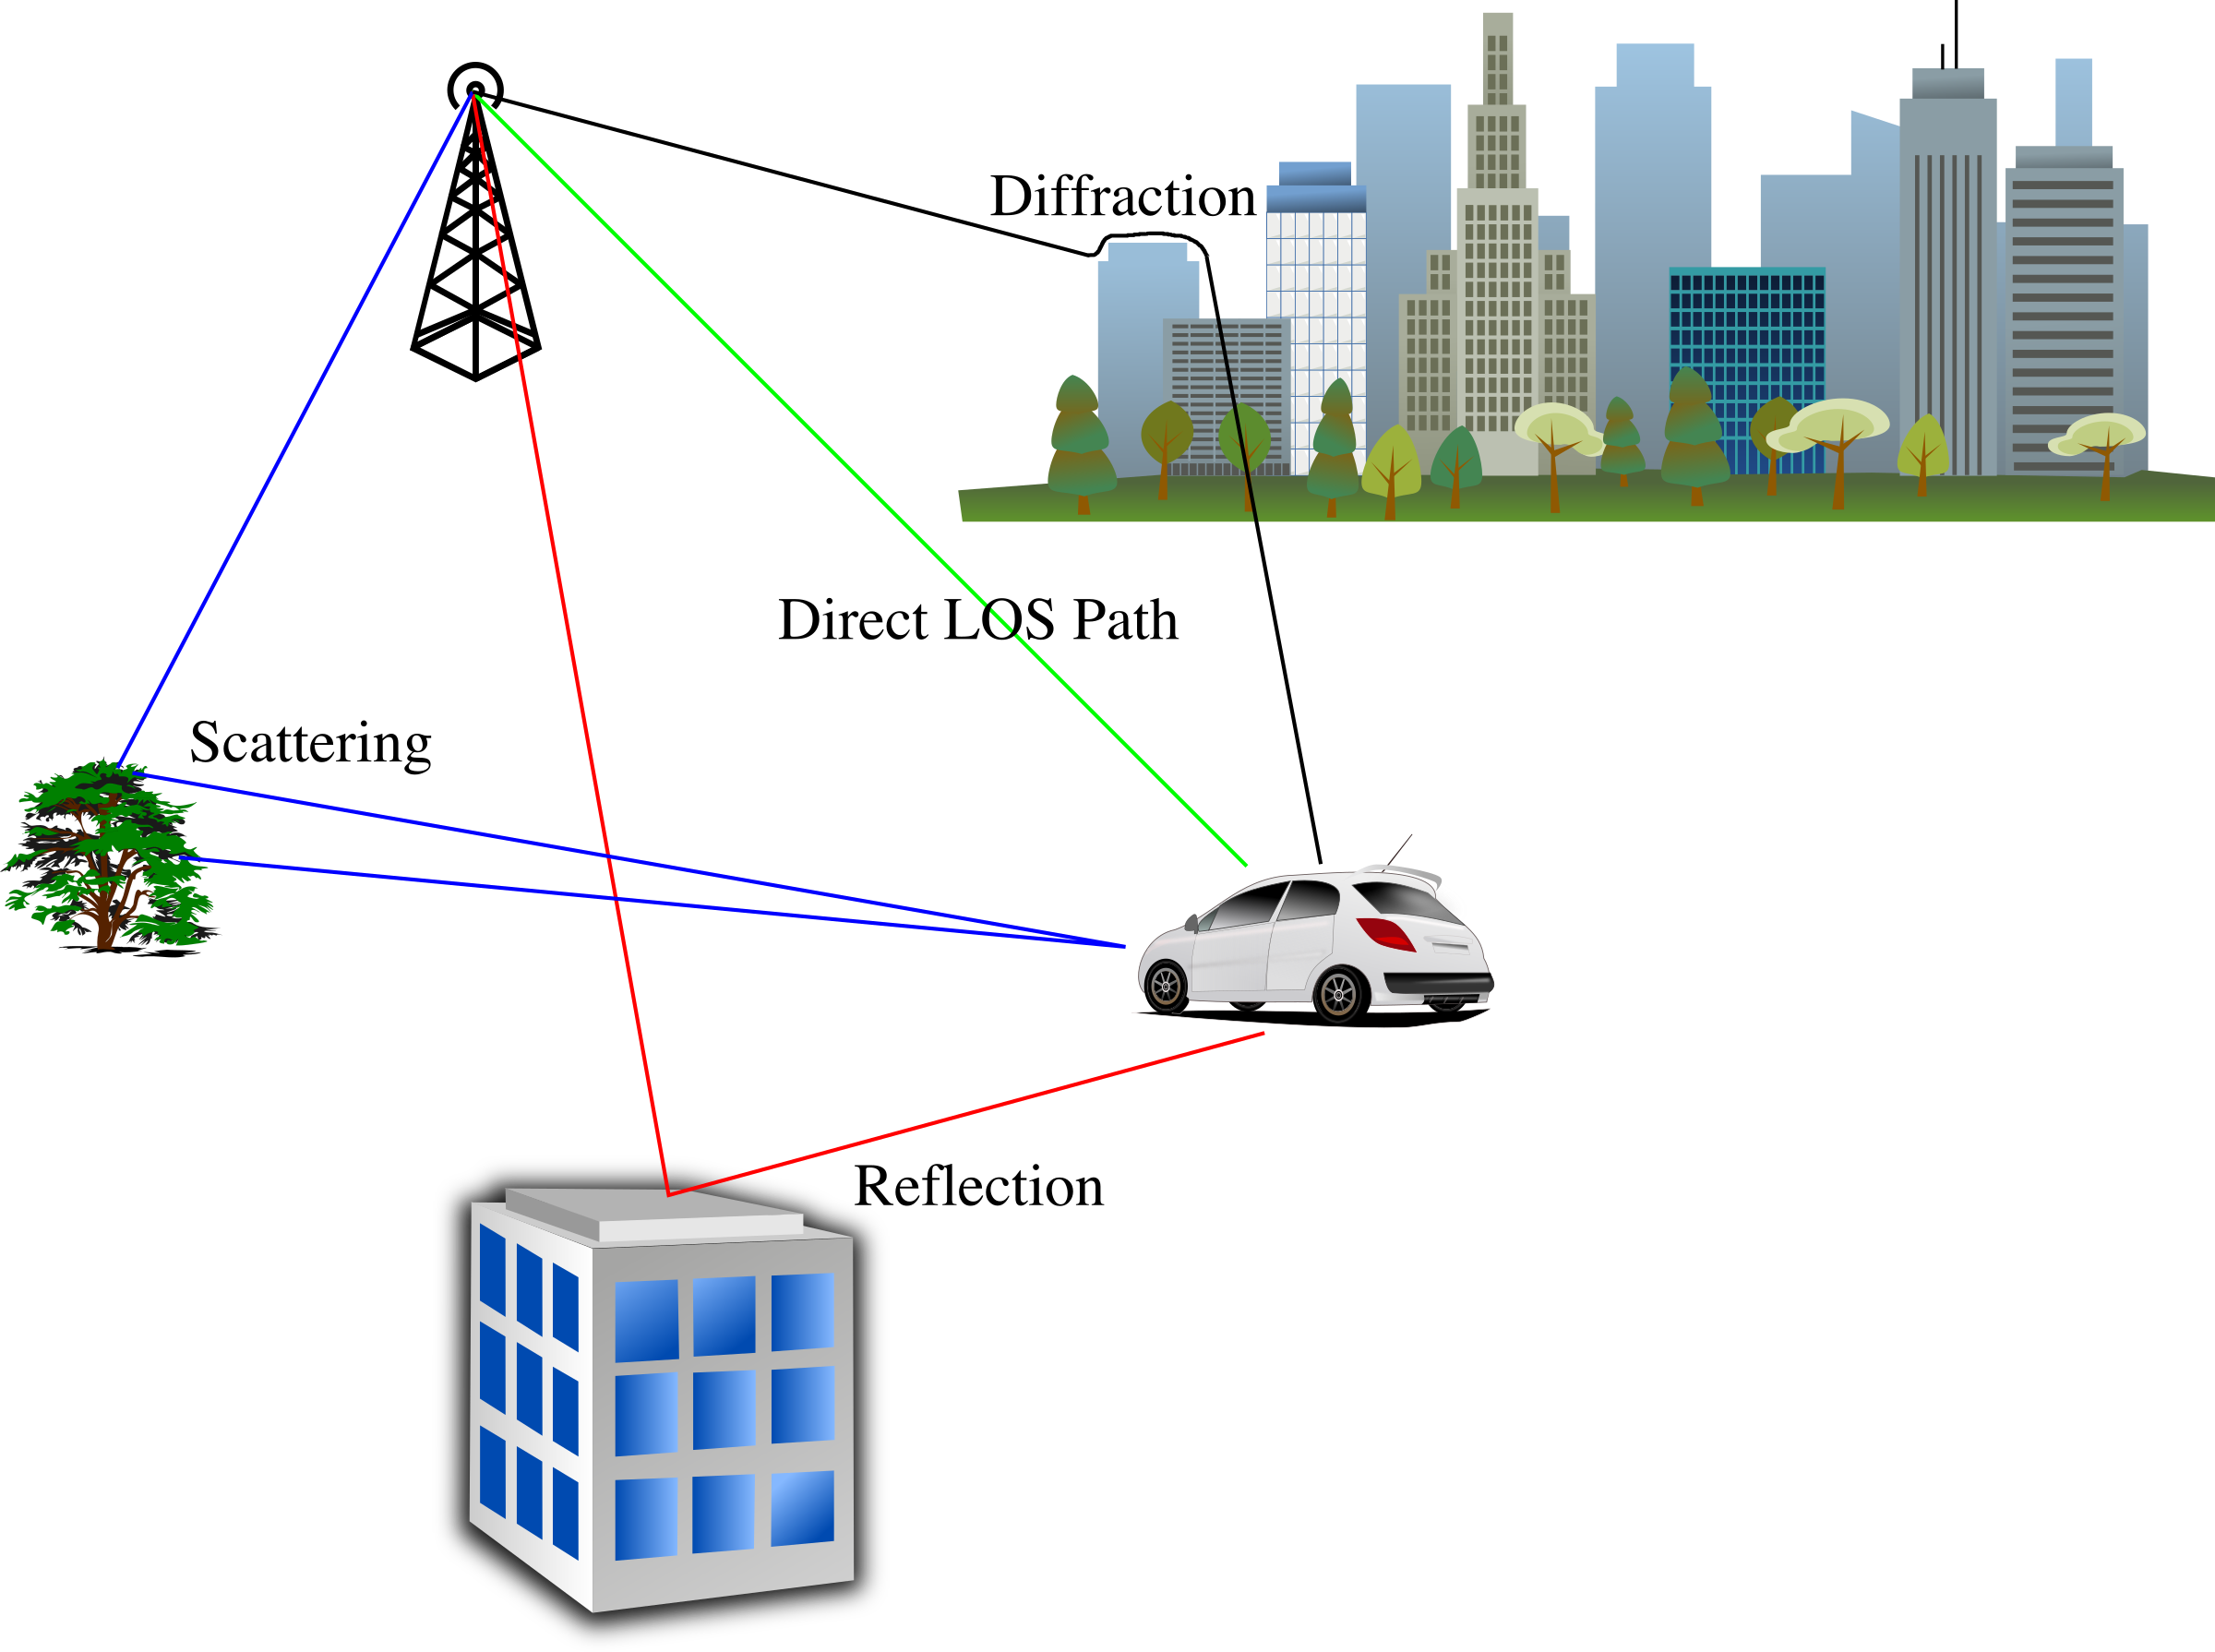
</div>


• The mobile or indoor channel is characterized by multipath reception. The signal arriving at the receiver is not only a direct LOS path but also has many reflected components. Depending upon the density of scatterers, the signal will undergo different levels of fading.

• The channel fading can be mild, moderate, or severe. Different models exist for the statistical characterization of the channel. In communication theory, Nakagami-m, Rayleigh, and Ricean distributions are commonly used to model the scattered signals that reach the receiver by multiple paths.

• Depending on the density of scatterers, the signals will display different fading characteristics.

• Rayleigh and Nakagami-m models are used to model dense scatterers, while Ricean distribution models the fading with stronger LOS.

• The basic model of Rayleigh fading assumes a multipath signal to consist of a theoretically large number of reflected waves that are independently and identically distributed in phase and quadrature amplitudes. However, Rayleigh cannot model severe fading conditions; hence, other fading models must also be explored. One such model is the Nakagami-m fading Model.

• Rayleigh fading model is a particular case of the Nakagami-m fading model when m=1.


#### • Indoor channel models

A set of channel models were created during the development of the IEEE 802.11n standard. There are six such channel models with different Impulse responses corresponding to different Indoor environments. An overview of these channel models can be seen in the below table.

|Model |Number Of taps|Break point distance (m)|RMS delay spread (ns) |Model LOS Kfactor Tap index 1|LOS K-factor All other taps|NLOS K-factor All taps|Propagation Scenario |Usage Model |
|:-----:|:-----:|:---:|:-----:|:-----:|:-----:|:---:|:-----:|-----|
|A |1  |5   |0   |1 |0  |0   |Flat fading |Gaussian Channel-like |
|B |9  |5   |15   |1 |0  |0   |Indoor Residential |Intra Room, Room to Room |
|C |14  |5   |30  |1 |0  |0   |Indoor Residential/Small Office |Enclosed Offices Meeting, Conference or classrooms  |
|D |18  |10   |50   |2 |0  |0   |Indoor Typical Office  |Sea of cubes , large classrooms, large conference rooms |
|E |18  |20   |100   |4 |0  |0   |Indoor Large Office/Warehouse|Multi-story office, campus small hotspot |
|F |18  |30   |150   |4 |0  |0   |Large Space Indoor (pseudo outdoor).  |Large Indoor HotspotAirport  |

#### • Path loss model

|Channel Model |dBP (m) |Slope before dBP|Slope after dBP| 
|:-----:|:-----:|:---:|:-----:|
|B |5  |2   |3.5   |
|D|10|2   |3.5 |

• To determine the achievable range between transmitter and receiver, a pathloss model is used.

• The Pathloss model captures the power fall-off related to distance. 

• The path-loss model is a free space model up to a breakpoint distance, and then it has a 3.5 pathloss exponent.

#### • The Ricean K-factor

• The ratio of the powers of the LoS (Line of Sight) component to the diffuse component is the 
Ricean K-factor, which measures the relative strength of the LoS. 

• The distance between the transmitter and receiver determines whether the channel 
should be modeled as LOS or NLOS (Non-Line of Sight). 

• For a LOS channel, the K-factor only applies to the first tap of the impulse response; all 
other taps have a K-factor of 0. 

• For an NLOS channel, the K-factor for all taps (including the first tap) is 0. 


### *3. Results*

<div style="text-align: center;">
    <p style="font-weight: bold; font-size: 16px;">Fig1 CIR histogram NLOS</p>
    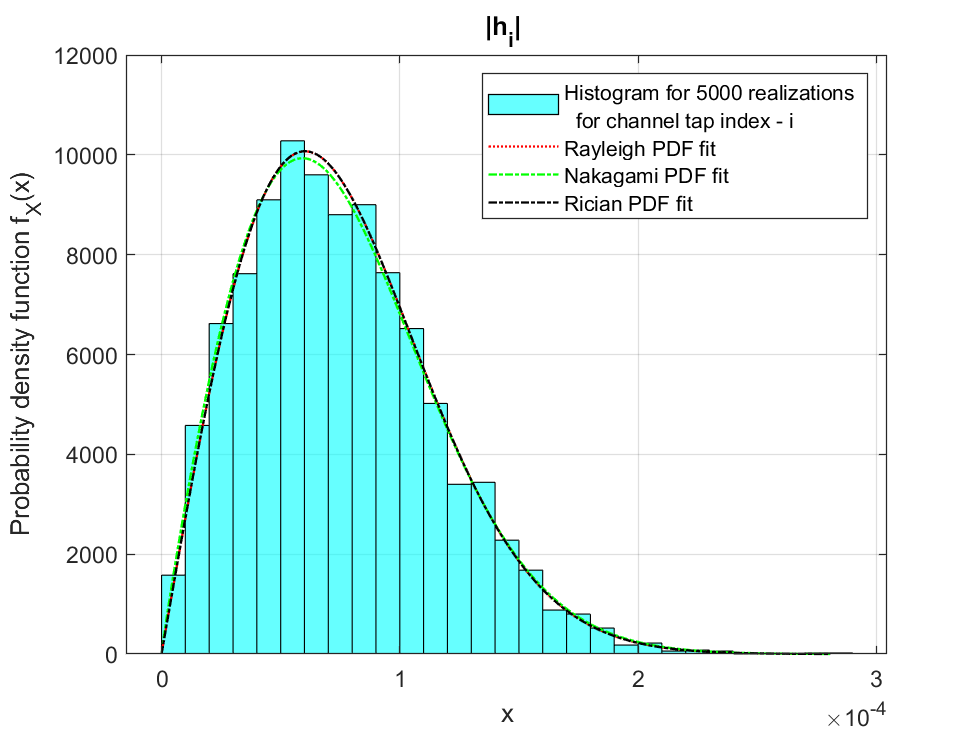
</div>


• This is the histogram and pdf fit for channel model D, which has a tx. rx. distance of 15 meters and for a channel "tap index of 4". 

• So, it is NLOS communication because the Breakpoint distance for channel model D is 10 meters, and the tx. rx. distance is set to 15 meters.

• Here, the Riciean K factor is zero; hence, riciean is reduced to Rayleigh. Also, for the Nakagami-m model, m is 1, so this also reduces to Rayleigh. Therefore, all the three pdf's are overlapping here.

<div style="text-align: center;">
    <p style="font-weight: bold; font-size: 16px;">Fig2 CIR histogram LOS</p>
    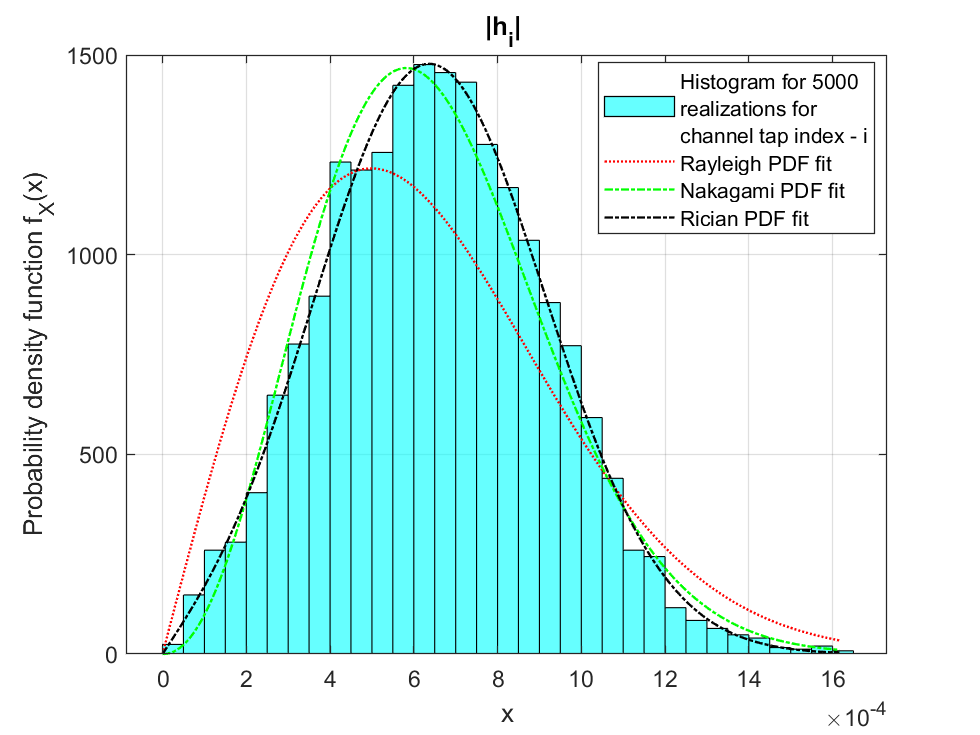
</div>


• Now, if we set the tx. rx. distance to 5 meters, which is LOS communication - less than the breakpoint distance (10m).

• Consider the "first tap" index where the Riciean K factor is non-zero. The Riciean K factor for the channel model D for the first tap index is two.

• For LOS propagation, as expected, the Riciean distribution is the best fit.

<div style="text-align: center;">
    <p style="font-weight: bold; font-size: 16px;">Fig3 input output waveform</p>
    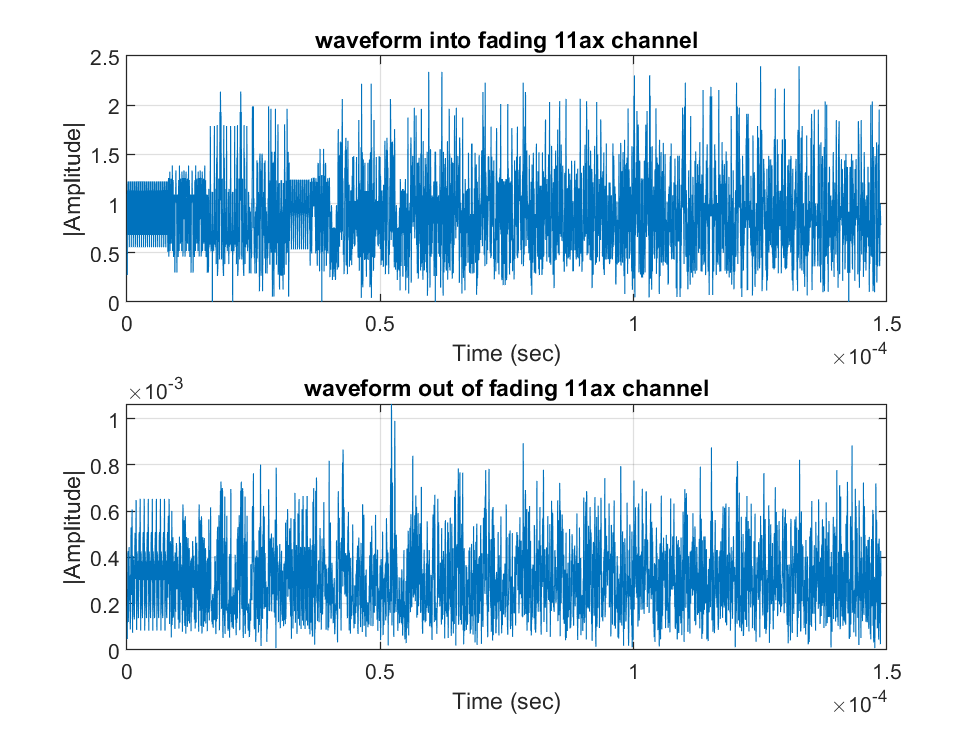
</div>


• This is the signal going into the fading channel.

• This is the faded signal coming out. 

• You can see that the preamble portion of the signal is also faded, Basically this is BPSK modulated signal.

<div style="text-align: center;">
    <p style="font-weight: bold; font-size: 16px;">Fig4 preamble</p>
    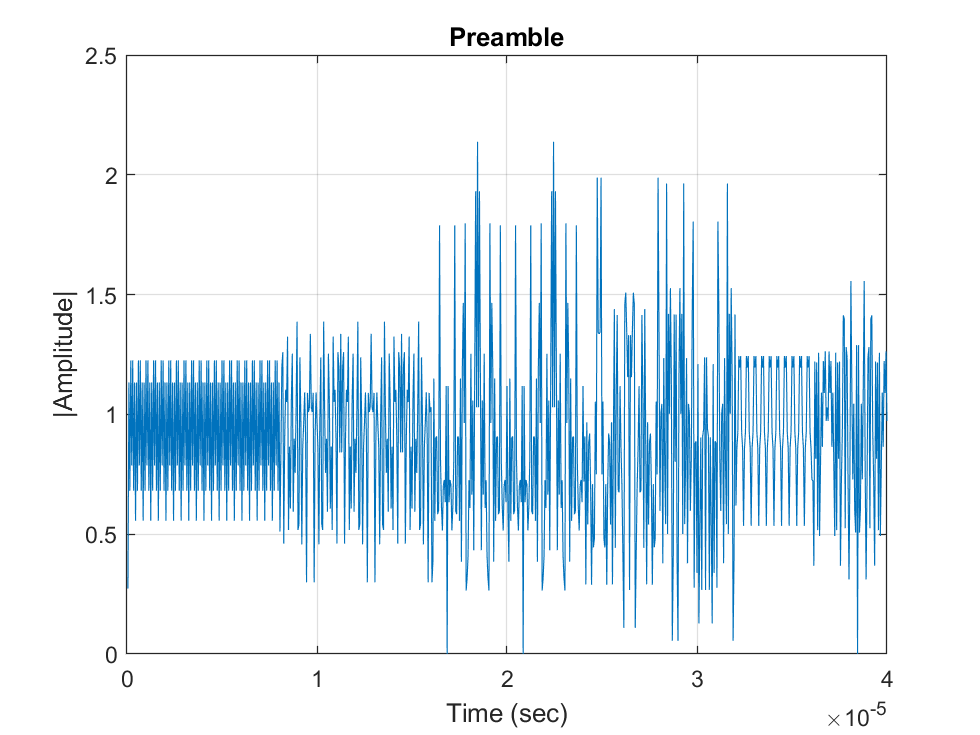
</div>


• This is the Preamble portion.


### *4. Summary*

• Rayleigh distribution models only non-line of Sight (NLOS) signal components
  between transmitter and receiver.
  
• Rician distribution models both Line of Sight (LOS) and non-line of Sight
  (NLOS) components between transmitter and receiver.
  
• Nakagami-m distribution models the wireless environments with moderate to
  severe fading such as urban or suburban areas

### *Note: For better clarity, watch [IEEE 802.11ax Channel Modeling](https://www.youtube.com/watch?v=mSVo0oRI5YM&list=PLNN9TCnjABcYHR9XRiQitBCHJUeT_58QG&index=1) on CNI YouTube channel*

### *4. Code*

In [2]:
% To obtain the channel impulse response (CIR) for various delay profiles and 
% to obtain the statistics of channel amplitude or the channel envelope

clc;close all;clear all;
cfgSU = wlanHESUConfig; % creates a single user (SU) high efficiency (HE)format configuration object. 
%This object contains the transmit parameters for the HE-SU format of IEEE P802.11ax/D3.1 standard.
cfgSU.ChannelBandwidth='CBW20';
% 'CBW20' | 'CBW40' |'CBW80' (default) | 'CBW160' | 'CBW320'
cfgSU.MCS = 0;   %BPSK Modulation and coding rate = 1/2. 
cfgSU.HELTFType =1;% 1x HE-LTF, 2x HE-LTF, and 4x HE-LTF, 
%with symbol duration of 3.2, 6.4, and 12.8 µs, respectively.
cfgSU.GuardInterval = 0.8; % 0.8, 1.6, 3.2 µs
cfgSU.APEPLength=100% Data field carry PSDU's. Specify PSDU length
%disp('Channel Bandwidth =' num2str(cfgSU.ChannelBandwidth));


cfgSU = 
  <a href="matlab:helpPopup wlanHESUConfig" style="font-weight:bold">wlanHESUConfig</a> with properties:

        ChannelBandwidth: 'CBW20'
           ExtendedRange: 0
     NumTransmitAntennas: 1
     NumSpaceTimeStreams: 1
          SpatialMapping: 'Direct'
     PreHESpatialMapping: 0
                    STBC: 0
                     MCS: 0
                     DCM: 0
           ChannelCoding: 'LDPC'
              APEPLength: 100
           GuardInterval: 0.8000
               HELTFType: 1
        UplinkIndication: 0
                BSSColor: 0
            SpatialReuse: 0
            TXOPDuration: 127
             HighDoppler: 0
    NominalPacketPadding: 0
    PostFECPaddingSource: 'mt19937ar with seed'
      PostFECPaddingSeed: 73

wlanHESUConfig creates a single user (SU) high-efficiency (HE)format configuration object is created. This object contains the transmit parameters for the HE-SU format of IEEE P802.11ax/D3.1 standard.

cfgSU.ChannelBandwidth: This parameter sets the channel bandwidth to 'CBW20', indicating a channel bandwidth of 20 MHz.

cfgSU.MCS: This parameter sets the Modulation and Coding Scheme (MCS) to 0, typically corresponding to BPSK modulation with a coding rate of 1/2. MCS values determine the modulation scheme and coding rate used for data transmission.

cfgSU.HELTFType: This parameter sets the High Efficiency-Long Training Field (HE-LTF) type to 1, indicating 1x HE-LTF. HE-LTFs are used for channel estimation and equalization in 802.11ax.

cfgSU.GuardInterval: This parameter sets the guard interval to 0.8 microseconds. The guard interval (also known as the cyclic prefix) is inserted between symbols to mitigate the effects of multipath propagation.

cfgSU.APEPLength: This parameter sets the length of the A-MPDU (Aggregate MAC Protocol Data Unit) payload to 100 bytes. A-MPDU is used to carry PSDUs (Physical Layer Protocol Data Units). The PSDU length is specified here.

These parameters configure the transmission parameters for the single-user HE format in the IEEE 802.11ax standard. They specify how data is modulated, encoded, and transmitted over the wireless channel.


In [3]:
% Configure a tgaxChannel channel with 20 MHz bandwidth.
tgaxChannel = wlanTGaxChannel('ChannelBandwidth','CBW20');
tgaxChannel.CarrierFrequency=2.4e9; %default is 5.25GHz   
tgaxChannel.SampleRate = 100e6;
tgaxChannel.PathGainsOutputPort = true;
tgaxChannel.DelayProfile='Model-D';
tgaxChannel.LargeScaleFadingEffect = 'PathLoss';

% release(tgaxChannel)
tgaxChannel.TransmitReceiveDistance=15;% in meters, breakpoint distance that obeys freespace pathloss model for Model B is 5m
PL_dB=info(tgaxChannel).Pathloss
tgaxChannel.NumPenetratedWalls = 2;%Number of walls between transmitter and receiver. Accounts for the wall penetration loss in the path loss calculation.
tgaxChannel.WallPenetrationLoss = 2.5; % penetration loss of a single wall in dB
PL_updated_dB=info(tgaxChannel).Pathloss
info_tgaxChannel=info(tgaxChannel)



PL_dB = 66.2092

PL_updated_dB = 71.2092

info_tgaxChannel = struct with fields:
           ChannelFilterDelay: 0
    ChannelFilterCoefficients: [18x40 double]
                   PathDelays: [0 1.0000e-08 2.0000e-08 3.0000e-08 4.0000e-08 5.0000e-08 6.0000e-08 7.0000e-08 8.0000e-08 9.0000e-08 1.1000e-07 1.4000e-07 1.7000e-07 2.0000e-07 2.4000e-07 2.9000e-07 3.4000e-07 3.9000e-07]
             AveragePathGains: [0 -0.9000 -1.7000 -2.6000 -3.5000 -4.3000 -5.2000 -6.1000 -6.9000 -7.8000 -4.7000 -7.3000 -9.9000 -12.5000 -13.7000 -18 -22.4000 -26.7000]
                     Pathloss: 71.2092

After setting the transmission parameters, we configure a tgaxChannel channel with 20 MHz bandwidth. The carrier frequency by default is 5.25GHz, but we have set it to 2.4GHz. The sample rate is set. The PathGainOutputPort is set to true so that you get the channel Path gains to plot the impulse response.  The Delay profile is chosen as Model D, a typical office enterprise. The large-scale fading effect is set to "pathloss".

Note that the distance between the transmitter and receiver is set to 15m (NLOS). You can also include the number of walls between the transmitter and receiver. The penetration loss of a single wall is set to 2.5 dB. The difference between pathloss in dB before and after adding walls between the transmitter and receiver is 5dB. You have an info(tgaxChannel), which gives information about channel filter coefficients, Pathgains, and Pathloss information.

In [4]:
numPackets =5000;
CIR=[];
for kk = 1:numPackets 
psdu = randi([0 1], getPSDULength(cfgSU)*8, 1); % Create a PSDU, getPSDULength(cfgSU)=100 bytes
txWaveform = wlanWaveformGenerator(psdu,cfgSU);
%Produce a waveform containing an 802.11ax HE single user packet 
%WAVEFORM is a complex Ns-by-Nt matrix where
% Ns is the number of time domain samples, Nt is the number of transmitting antennas

% Pass through a fading indoor tgaxChannel channel
[tgaxChannel_output,pathgains] = tgaxChannel(txWaveform);%% note Pathgains are independent of the input signal(values or the number of samples Ns) and depends only on the propagation MOdel:
reset(tgaxChannel);   % reset function resets the filters and creates a new channel realization. 

% The PathDelays provides the delay in seconds of each path (non-zero)
nonZeroTapIdx = round(info_tgaxChannel.PathDelays*tgaxChannel.SampleRate)+1;
Nh = size(info_tgaxChannel.ChannelFilterCoefficients,2);
% ChannelFilterCoefficients is an Np-by-Nh where Nh is the number of
% impulse response samples. Nh gives us the length of the channel impulse response.
impr = zeros(Nh,1);
% Create the CIR by setting non-zero paths to the path gains returned by the channel
impr(nonZeroTapIdx) = pathgains(1,:);
impr_abs=abs(impr);
    size(impr_abs);  %[Nh 1]
    CIR=[CIR impr_abs]; 
    size(CIR);% matrix of size Nh X L = Nh X numPkts
    % each row of CIR is ensemble of R.V corresponding to a particular channel tap
tap_index=CIR(nonZeroTapIdx(4), :); % 4th non-zero channel tap for NLOS  (d>=10 for channel model D)
%tap_index=CIR(nonZeroTapIdx(1), :); % consider always 1st non-zero channel tap for LOS  (d<=10 for channel model D)
end
size(tap_index)% [1 X Numpkts] has random variables corresponding to 4th tap for all the processed packets

ans = 1x2 double
           1        5000

Create a PSDU, getPSDULength(cfgSU)=100 bytes to generate a waveform containing an 802.11ax HE single-user packet. Now, the data Packet has been generated using the random number of bit patterns, and this packet, which consists of ones and zeroes, has to be converted into waveform before passing it to the channel. 
The waveform generation is done using a WLAN waveform generator, which accepts the data bit pattern and configuration object, and the tx waveform is created. The generated waveform is a complex Ns-by-Nt matrix where Ns is the number of time domain samples, and Nt is the number of transmitting antennas. Since it is a SISO configuration, what we are doing is Nt will be equal to 1, and the Tx waveform will be a column vector. Pass through a fading indoor tgaxChannel channel.

Pathgains are independent of the input signal (values or the number of samples Ns) and depend only on the propagation Model. 
The reset function resets the filters and creates a new channel realization. 
The Pathdelays provide the delay in seconds for each path (non-zero).

ChannelFilterCoefficients is an Np-by-Nh where Np is the number of non-zero taps, and Nh is the number of impulse response samples. Nh gives us the length of the channel impulse response.
Create the CIR by setting non-zero paths to the path gains returned by the channel matrix of size Nh X L = Nh X numPkts.
Each row of CIR is an ensemble of random variables corresponding to a particular channel tap. Consider 4th non-zero channel tap (1 X Numpkts) has random variables corresponding to the 4th tap for all the processed packets.

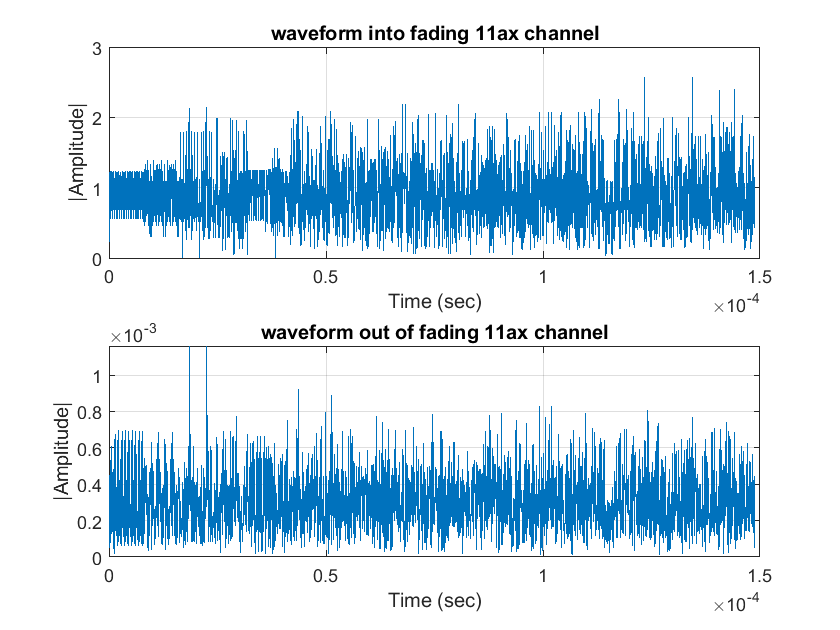

In [5]:
figure(1)
tt=1:length(txWaveform);
subplot(2,1,1)
plot((tt/20e6),abs(txWaveform));grid on;

xlabel('Time (sec)');
ylabel('|Amplitude|');
title('waveform into fading 11ax channel'); 
subplot(2,1,2)
plot((tt/20e6),abs(tgaxChannel_output));grid on;
xlabel('Time (sec)');
ylabel('|Amplitude|');
title('waveform out of fading 11ax channel'); 

A figure 1 with two subplots is created. The absolute values of input txWaveform and tgaxChannel_output waveform, assuming a sample rate of 20e6 samples per second, are plotted.



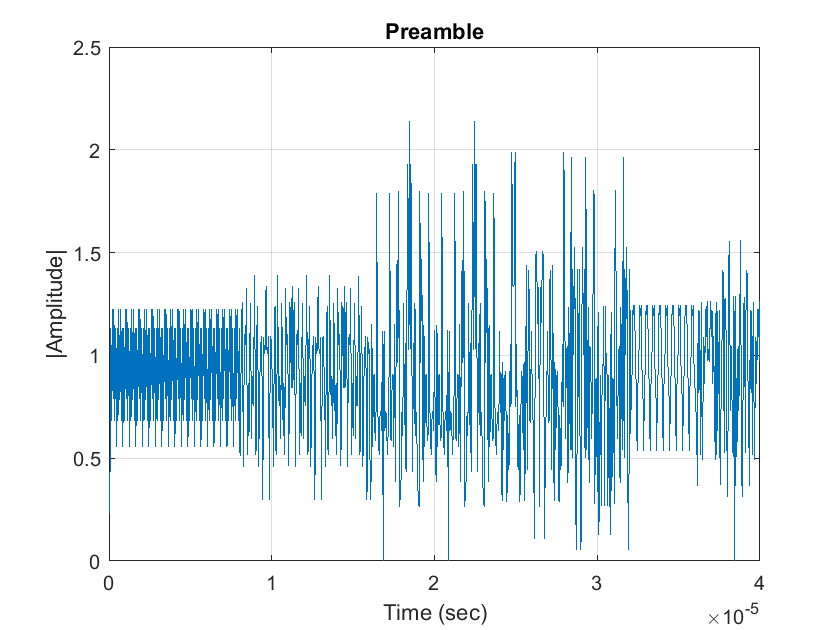

In [6]:
ind=wlanFieldIndices(cfgSU);
figure(2)
preamble=txWaveform((ind.LSTF(1):ind.HELTF(2)));
tt1=1:length(preamble);
plot((tt1/20e6),abs(preamble));grid on;
xticks([0 10 20 30 40]*1e-6);
xlabel('Time (sec)');
ylabel('|Amplitude|');
title('Preamble'); 


This code first obtains the WLAN field indices using the wlanFieldIndices function based on the WLAN configuration cfgSU. Then, it extracts the preamble from the transmitted waveform txWaveform using the obtained indices. After generating the time vector for plotting, it plots the absolute values of the preamble against time. The x-axis ticks are set to specific values, and appropriate labels and titles are added to the plot.

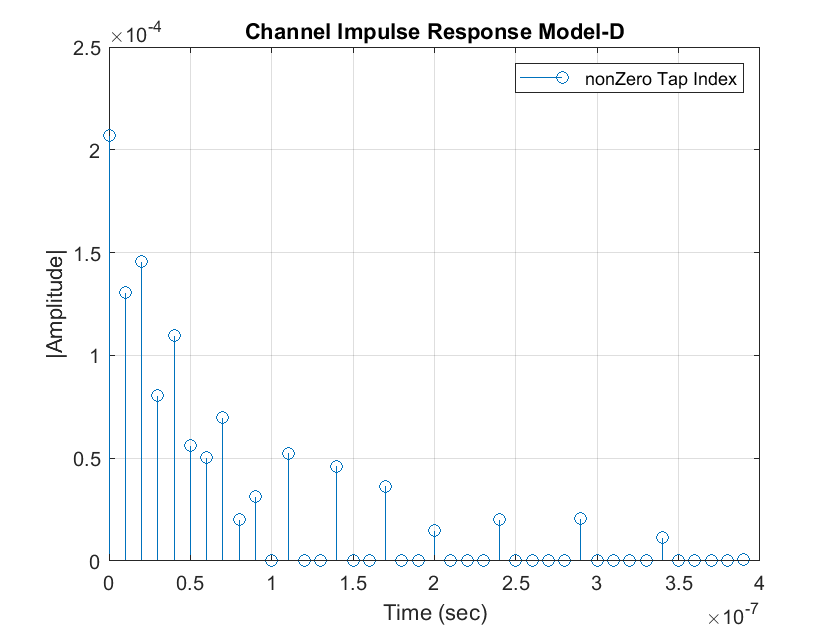

In [7]:
figure(3)
time = (1/tgaxChannel.SampleRate)*(0:length(impr)-1);grid on;
stem(time,impr_abs);%h(n)is same as impulse_response
grid on;
xlabel('Time (sec)');
ylabel('|Amplitude|');
title('Channel Impulse Response Model-D'); 
legend('nonZero Tap Index')
% save(sprintf('Impulse_response_fading_channel_1_%02d',ii), 'impr_abs');

This code plots the absolute values of the impulse response (impr_abs) against time. It generates the time vector based on the sampling rate of the channel (tgaxChannel.SampleRate). Then, it plots the impulse response using the stem function, typically used for discrete data like impulse responses. Finally, it adds labels to the axes, a title to the plot, and a legend indicating the meaning of the plot.


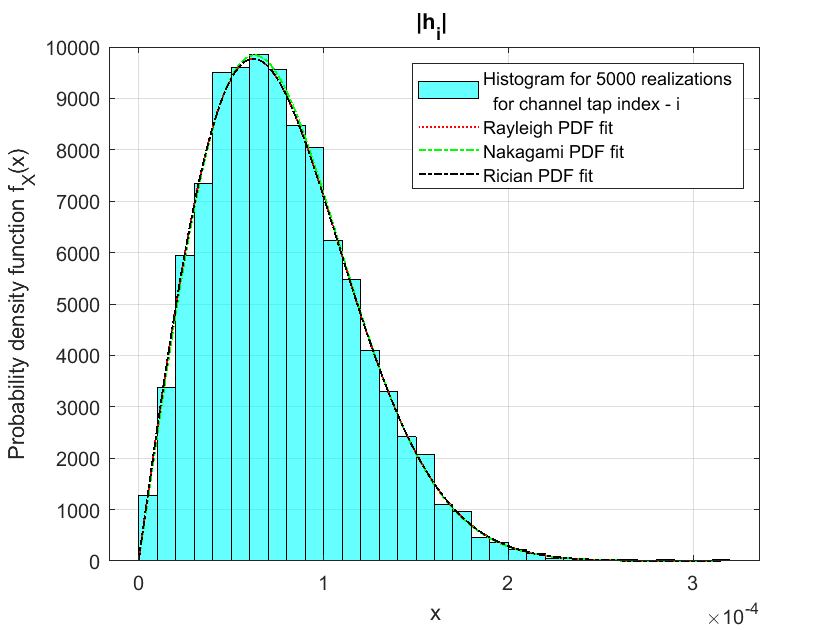

zz1 = 
  <a href="matlab: helpPopup prob.RayleighDistribution">RayleighDistribution</a>

  Rayleigh distribution
    B = 6.20768e-05   [6.12283e-05, 6.29492e-05]

zz2 = 
  <a href="matlab: helpPopup prob.NakagamiDistribution">NakagamiDistribution</a>

  Nakagami distribution
       mu =     1.01832   [2.22507e-308, Inf]
    omega = 7.70705e-09   [2.22507e-308, Inf]

zz3 = 
  <a href="matlab: helpPopup prob.RicianDistribution">RicianDistribution</a>

  Rician distribution
        s = 1.12523e-05   [9.83504e-06, 1.26696e-05]
    sigma = 6.15648e-05   [5.86373e-05, 6.46384e-05]

In [8]:
figure(4)   
AA4=histogram(tap_index); %exponential PDF  
size(tap_index); %[1 X Numpkts]
AA4.Normalization='pdf';
AA4.FaceColor=[0 1 1];
% axis([0 10 0 1])
   hold on ;
  zz1 = fitdist(tap_index','rayleigh')
  zz2= fitdist(tap_index','nakagami')
  zz3=fitdist(tap_index','rician')

  l1=0;l2=max(tap_index);
x= l1:((l2-l1)/1000):l2;
hold on; grid on;
% y1=raylpdf(x,zz1.B);
y1=pdf('rayleigh',x,zz1.B);
%y = pdf(name,x,A) returns the probability density function (pdf) for the 
%one-parameter distribution family specified by name and the distribution parameter A, evaluated at the values in x.

y2=pdf('nakagami',x,zz2.mu,zz2.omega);
%y = pdf(name,x,A,B) returns the pdf for the two-parameter distribution family specified
%by name and the distribution parameters A and B, evaluated at the values in x
y3=pdf('rician',x,zz3.s, zz3.sigma);

plot(x,y1,'r:','LineWidth',1);hold on;
plot(x,y2,'g-.','LineWidth',1);grid on;
plot(x,y3,'k-.','LineWidth',1);grid on;
xlabel('x');
 ylabel('Probability density function f_X(x)');
legend('Histogram for 5000 realizations \newline  for channel tap index - i','Rayleigh PDF fit','Nakagami PDF fit','Rician PDF fit','Location','NorthEast')
title('|h_i| ')

The distance between the transmitter and receiver was 15m (NLOS). Here, the Riciean K factor is zero; hence, riciean is reduced to Rayleigh. Also, for the Nakagami-m model, m is 1, so this also reduces to Rayleigh. Therefore, all three pdf's are overlapping here. 

You can change the transmitter and receiver distance to 5m and observe the output. For LOS, consider always 1st non-zero channel tap (d<=10 for channel model D). That is tap_index=CIR(nonZeroTapIdx(1), :); 

Plotting the histogram of the tap_index data using the histogram function. It sets the normalization of the histogram to 'pdf'.
It also sets the face color of the histogram to cyan. Finally, it uses hold on to hold the plot so that subsequent plots are overlaid on the same axes. The parameters of the fitted distribution is displayed with 95% confidence interval. 

This three lines line fits a Rayleigh distribution, Nakagami distribution,Rician distribution  to the data stored in tap_index and stores the resulting distribution object in the variables.


Creating a range of values for the x-axis (x) starting from 0 up to the maximum value in tap_index, divided into 1000 equally spaced points. It then uses hold on to hold the current plot so that subsequent plots are overlaid on the same axes, and grid on adds gridlines to the plot.

y = pdf(name, x, A, B) returns the pdf for the two-parameter distribution family specified by name and the distribution parameters A and B, evaluated at the values in x.
This code overlays three PDFs, y1, y2, and y3, on the histogram plot of tap_index.
Each PDF is plotted with a different line style and color. The legend indicates the meaning of each line in the plot. 
